# Understanding The Distributions of Variables In BdNMC

### Use units of MeV!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## $E_e(\theta)$

In [2]:
def Ee_theta(theta, Ex, mx):
    """Electron energy as a function of the scattering angle theta
    Max for theta = 0
    Min for theta = pi/2

    Args:
        theta (float): angle (radians)
        Ex (float, np.array): Energy of the DM particle (MeV)
        mx (float): mass of tje DM particle (MeV)

    Returns:
        float, np.array: Electron energies (MeV)
    """
    me = 0.511 # MeV
    num = me * ((Ex + me)*(Ex+me)+(Ex**2 - mx**2)*np.cos(theta)**2)
    den = ((Ex + me)**2 - (Ex**2 - mx**2)*np.cos(theta)**2)
    return num / den

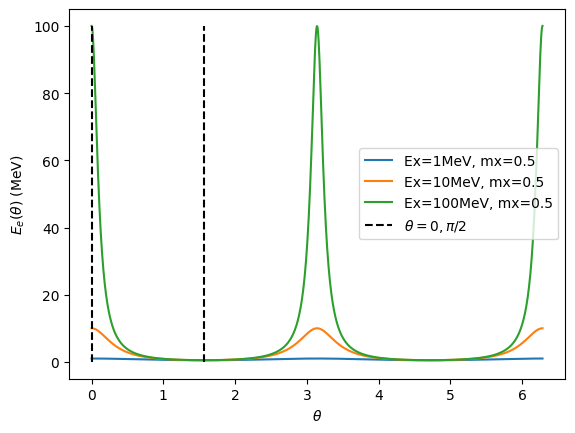

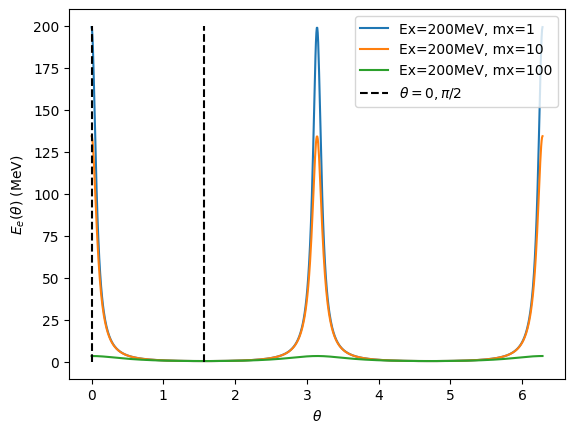

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
theta = np.linspace(0, 2*np.pi, 1000)
ax.plot(theta, Ee_theta(theta, 1, 0.5), label='Ex=1MeV, mx=0.5')
ax.plot(theta, Ee_theta(theta, 10, 0.5), label='Ex=10MeV, mx=0.5')
ax.plot(theta, Ee_theta(theta, 100, 0.5), label='Ex=100MeV, mx=0.5')
ax.vlines([0.0, np.pi/2.0], 0, 100, colors="k", label=r'$\theta=0, \pi/2$', linestyles='dashed')
ax.set(xlabel=r'$\theta$', ylabel=r'$E_e(\theta)$ (MeV)')
ax.legend()
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(theta, Ee_theta(theta, 200, 1), label='Ex=200MeV, mx=1')
ax2.plot(theta, Ee_theta(theta, 200, 10), label='Ex=200MeV, mx=10')
ax2.plot(theta, Ee_theta(theta, 200, 100), label='Ex=200MeV, mx=100')
ax2.vlines([0.0, np.pi/2.0], 0, 200, colors="k", label=r'$\theta=0, \pi/2$', linestyles='dashed')
ax2.set(xlabel=r'$\theta$', ylabel=r'$E_e(\theta)$ (MeV)')
ax2.legend()
plt.show()

## $\frac{d\sigma}{dE_e}$

In [4]:
kappa = 1e-3
alphaEM = 1/137
alphaD = 0.1
Me = 0.511 # MeV

def dsigma_dE_fermionic(Ee, EDM, MDM, MDP):
    coef = 4 * np.pi * kappa * kappa * alphaEM * alphaD
    Nominator = (EDM * EDM * Me + EDM * (EDM * Me + 2 * Me * (-Ee + Me)) + (Ee - Me) * ((Ee - 2 * Me) * Me - MDP * MDP))
    Denominator = (((MDP * MDP + 2 * (Ee - Me) * Me)**2) * (EDM * EDM - MDM * MDM))
    ratio = Nominator / Denominator
    return coef * ratio

def dsigma_dE_scalar(Ee, EDM, MDM, MDP):
    coef = 4 * np.pi * kappa * kappa * alphaEM * alphaD
    F1N = 2.0 * Me * EDM * EDM - (2.0 * Me * EDM + MDM * MDM) * (Ee - Me)
    F1D = (EDM * EDM - MDM * MDM) * (MDP * MDP + 2 * Me * Ee - 2 * Me * Me)**2
    F1 = F1N / F1D
    return coef * F1

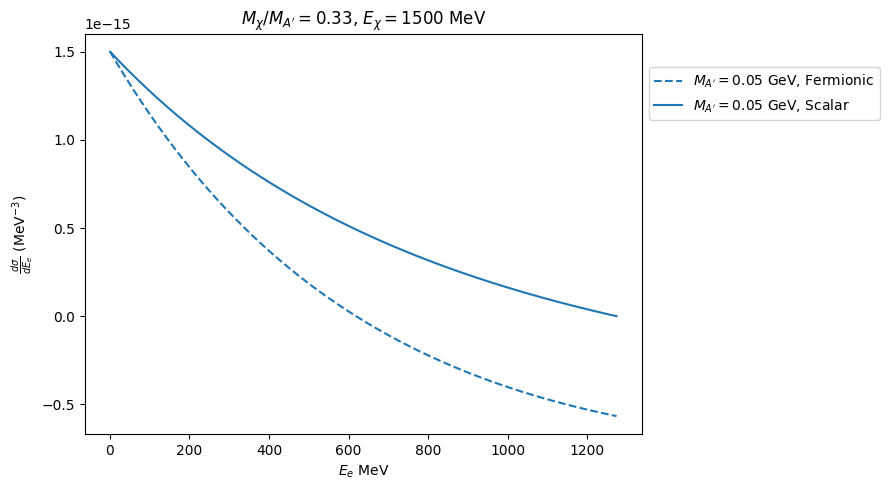

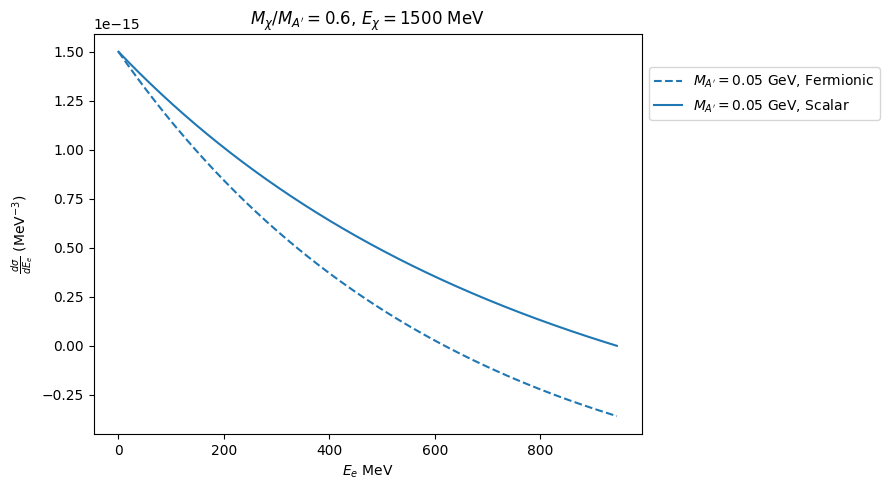

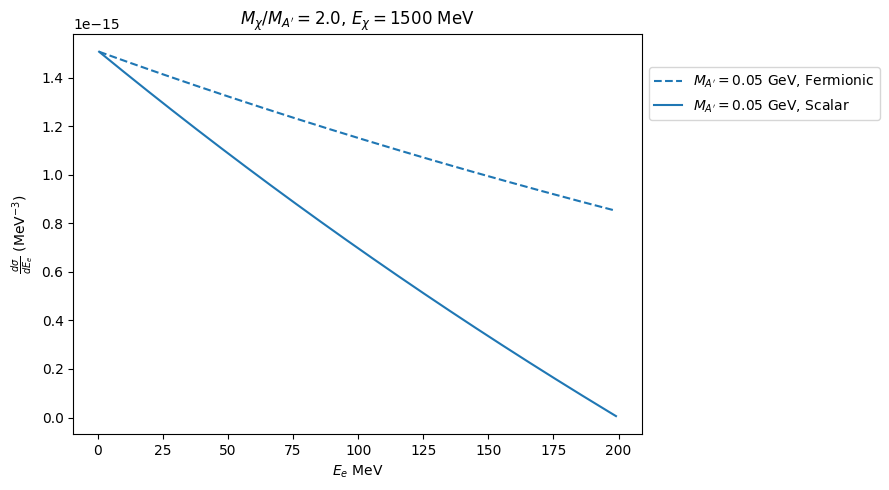

In [22]:

EDM = 1500 # <EDM> is like 1.5 GeV probs


dts = [0.33, 0.6, 2.0]
MAs = [0.05*1000] #[0.01*1000, 0.05*1000, 0.1*1000] # MeV
cols = ["tab:blue", "tab:red", "tab:green"]
for dt in dts:
    fig = plt.figure(figsize=(9,5))
    ax = fig.add_subplot(111)
    for i, MA in enumerate(MAs):
        mchi = dt * MA
        Ee = np.linspace(0.511, Ee_theta(0, EDM, mchi), 5000)
        ax.plot(Ee, dsigma_dE_fermionic(Ee, EDM, mchi, MA), label=r"$M_{A'}=$"+f'{MA/1000} GeV, Fermionic', color = cols[i], linestyle='dashed')
        ax.plot(Ee, dsigma_dE_scalar(Ee, EDM, mchi, MA), label=r"$M_{A'}=$"+f'{MA/1000} GeV, Scalar', color = cols[i])
    
    ax.set(xlabel=r'$E_e$ MeV', ylabel=r'$\frac{d\sigma}{dE_e}$ (MeV$^{-3}$)', title=r"$M_\chi / M_{A'}=$"+f'{dt}, '+'$E_\chi=$'+f'{EDM} MeV')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))
    #ax.set_yscale('log')
    fig.tight_layout()
    fig.savefig(f"../plots/distributions/dsigma_dE_{dt}.png")
    fig.savefig(f"../plots/distributions/dsigma_dE_{dt}.pdf")
plt.show()


/tmp/ipykernel_161824/3626536273.py:10: RuntimeWarning: divide by zero encountered in divide
  ratio = Nominator / Denominator
/tmp/ipykernel_161824/3626536273.py:17: RuntimeWarning: divide by zero encountered in divide
  F1 = F1N / F1D


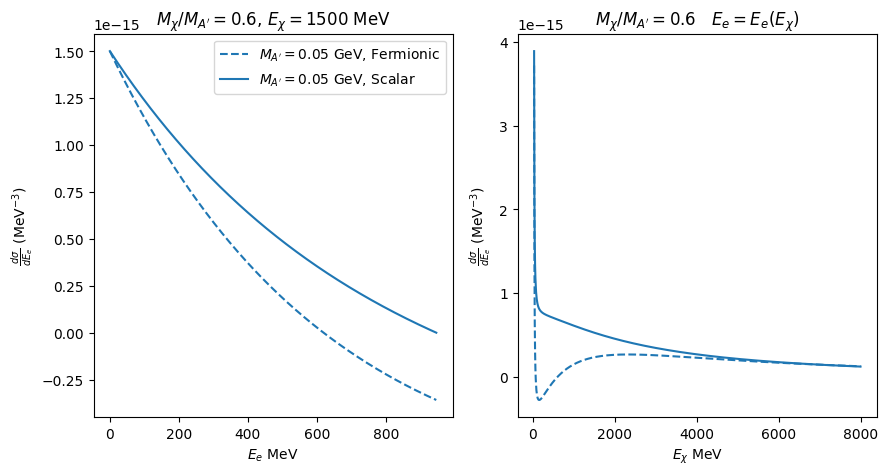

In [36]:
fig = plt.figure(figsize=(9,5))
ax = fig.subplots(1,2)




dt = 0.6
MAs = [0.05*1000] #[0.01*1000, 0.05*1000, 0.1*1000] # MeV
cols = ["tab:blue", "tab:red", "tab:green"]

# first plot E_e vs dSigma/dE_e
EDM = 1500 # <EDM> is like 1.5 GeV probs
mchi = dt * MA
Ee = np.linspace(0.511, Ee_theta(0, EDM, mchi), 5000)
ax[0].plot(Ee, dsigma_dE_fermionic(Ee, EDM, mchi, MA), label=r"$M_{A'}=$"+f'{MA/1000} GeV, Fermionic', color = cols[i], linestyle='dashed')
ax[0].plot(Ee, dsigma_dE_scalar(Ee, EDM, mchi, MA), label=r"$M_{A'}=$"+f'{MA/1000} GeV, Scalar', color = cols[i])

ax[0].set(xlabel=r'$E_e$ MeV', ylabel=r'$\frac{d\sigma}{dE_e}$ (MeV$^{-3}$)', title=r"$M_\chi / M_{A'}=$"+f'{dt}, '+'$E_\chi=$'+f'{EDM} MeV')
ax[0].legend()

# second plot E_chi vs dSigma/dE_e
EDM = np.linspace(mchi, 8000, 1000)
Ee = Ee_theta(0, EDM, mchi) / 2
ax[1].plot(EDM, dsigma_dE_fermionic(Ee, EDM, mchi, MA), label=r"$M_{A'}=$"+f'{MA/1000} GeV, Fermionic', color = cols[i], linestyle='dashed')
ax[1].plot(EDM, dsigma_dE_scalar(Ee, EDM, mchi, MA), label=r"$M_{A'}=$"+f'{MA/1000} GeV, Scalar', color = cols[i])
ax[1].set(xlabel=r'$E_\chi$ MeV', ylabel=r'$\frac{d\sigma}{dE_e}$ (MeV$^{-3}$)', title=r"$M_\chi / M_{A'}=$"+f'{dt}\t'+r"$E_e=E_e(E_\chi)$")



fig.tight_layout()
fig.savefig(f"../plots/distributions/dsigma_dE_both.png")
fig.savefig(f"../plots/distributions/dsigma_dE_both.pdf")
plt.show()

## $\sigma(Ee)$

In [6]:
def sigma_fermionic(Ee, EDM, MDM, MDP):
    Me = 0.511 # MeV
    # note there is a + C determined by the boundary conditions
    # usually do F2(E_Max) - F2(E_Min)
    denominator = -2.0 * Me*Me * ((EDM*EDM)-(MDM*MDM))
    t1 = (-2.0 * Ee * Me)
    t2 = ( (MDP*MDP*MDP*MDP)+ (8.*EDM*EDM*Me*Me) + (2.*MDP*MDP*((2.*EDM*Me) + (Me*Me) + (MDM*MDM))) ) / ((MDP*MDP) + (2. * (Ee-Me) * Me))
    t3 = 2.* ((MDP*MDP) + (2.*EDM*Me) + (Me*Me) + (MDM*MDM)) * np.log((MDP*MDP) + (2.*(Ee-Me)*Me))

    return alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator
    #return 18.0 * alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator

/tmp/ipykernel_161824/346560502.py:10: RuntimeWarning: divide by zero encountered in divide
  return alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator


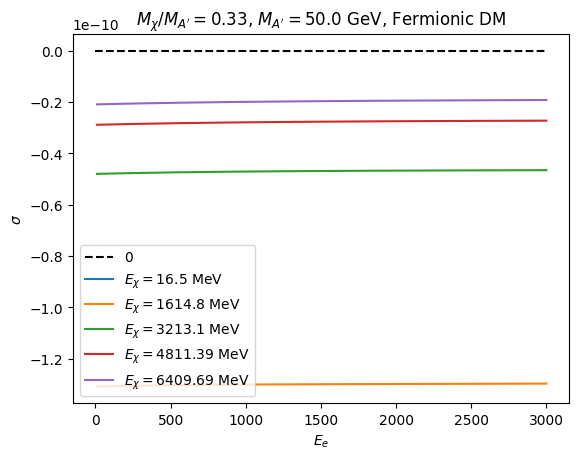

In [7]:
dt = 0.33
MA = 0.05*1000 # MeV
mchi = dt * MA

Ee = np.linspace(10, 3000, 100000) # 0.01 GeV to 3 GeV is typical for e- at this dt / MA
EDM = np.linspace(mchi, 8000, 1000) # mchi to 8 GeV is typical for 0.33, eta, 0.05 MA


# fixed MA and DT
# vary EMD
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hlines(0, 0, 3000, colors="k", linestyles="--", label='0')
for Echi in EDM[::200]:
    ax.plot(Ee, sigma_fermionic(Ee, float(Echi), mchi, MA), label=r"$E_\chi=$"+f'{round(Echi,2)} MeV')
    ax.set(xlabel=r'$E_e$', ylabel=r'$\sigma$', title=r"$M_\chi / M_{A'}=$"+f'{dt}, '+r"$M_{A'}=$"+f'{MA} GeV, Fermionic DM')
    ax.legend()

## $\int_{E_{min}}^{E_{max}} \frac{d \sigma} {d E_e} dE_e = F_2(E_{max}) - F_2(E_{min})$
$$ E_{min} = E_e(\pi/2) \quad E_{max} = E_e(0) $$

/tmp/ipykernel_161824/346560502.py:10: RuntimeWarning: divide by zero encountered in divide
  return alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator
/tmp/ipykernel_161824/31450416.py:16: RuntimeWarning: invalid value encountered in subtract
  ans = sigma_fermionic(E_e_max, EDM, mchi, ma) - sigma_fermionic(E_e_min, EDM, mchi, ma)


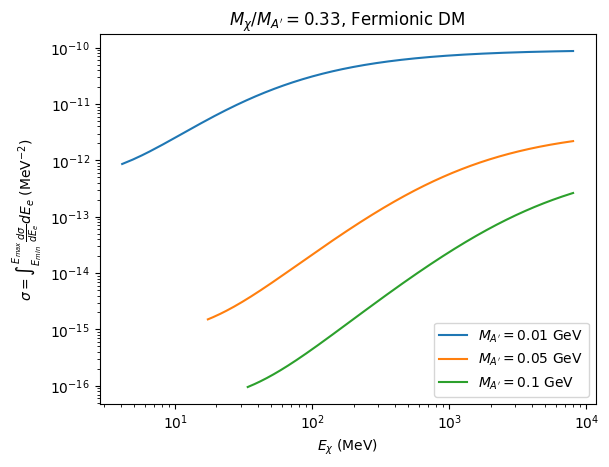

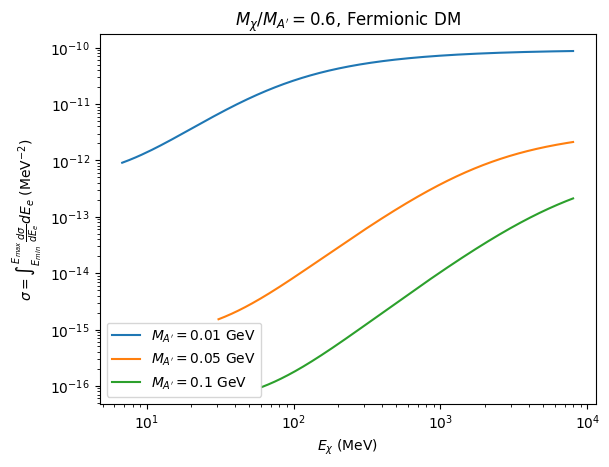

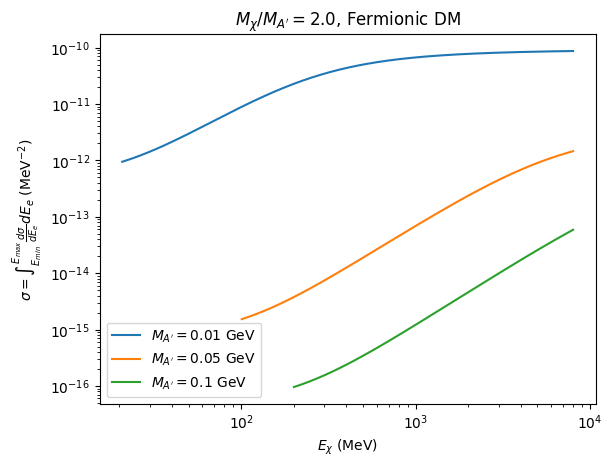

In [8]:
dts = [0.33, 0.6, 2.0]
MAs = [0.01*1000, 0.05*1000, 0.1*1000] # MeV



for dt in dts:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for ma in MAs:
        
        mchi = dt * ma
        EDM = np.linspace(mchi, 8000, 10000) # mchi to 8 GeV is typical for 0.33, eta, 0.05 MA
        E_e_min = Ee_theta(np.pi/2, EDM, mchi)
        E_e_max = Ee_theta(0, EDM, mchi)

        ans = sigma_fermionic(E_e_max, EDM, mchi, ma) - sigma_fermionic(E_e_min, EDM, mchi, ma)
        #print(E_e_min[-1], E_e_max[-1], ans)
        ax.plot(EDM, ans, label=r"$M_{A'}=$"+f'{ma/1000} GeV')
        #ax.vlines(mchi, 10e-9, 10e-15, colors="k", linestyles='dashed')
        #ax.vlines(ma, 10e-9, 10e-13, colors="r", linestyles='dashed')

    ax.set(xlabel=r'$E_\chi$ (MeV)', ylabel=r'$\sigma=\int_{E_{min}}^{E_{max}} \frac{d \sigma} {d E_e} dE_e$ (MeV$^{-2})$', title=r"$M_\chi / M_{A'}=$"+f'{dt}, Fermionic DM')
    ax.legend()
    ax.loglog()
    plt.savefig(f"../plots/distributions/sigma_fermionic_dt_{dt}.png")
    plt.show()


/tmp/ipykernel_161824/346560502.py:10: RuntimeWarning: divide by zero encountered in divide
  return alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator
/tmp/ipykernel_161824/4062246602.py:17: RuntimeWarning: invalid value encountered in subtract
  ans = 200**2 * (sigma_fermionic(E_e_max, EDM, mchi, ma) - sigma_fermionic(E_e_min, EDM, mchi, ma)) / (100*(10**15))


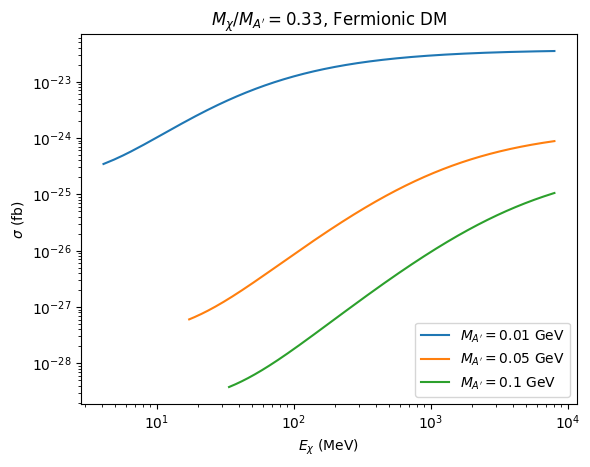

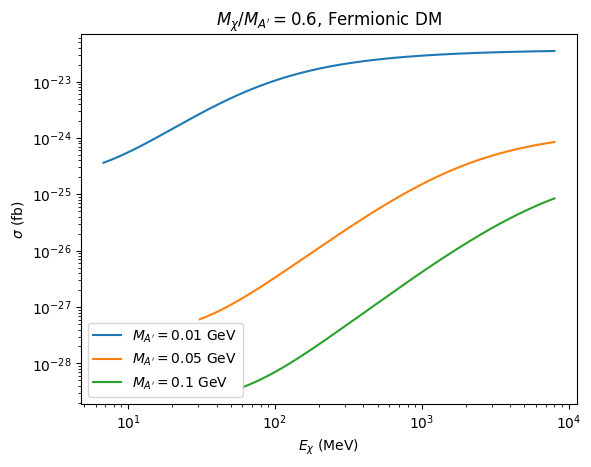

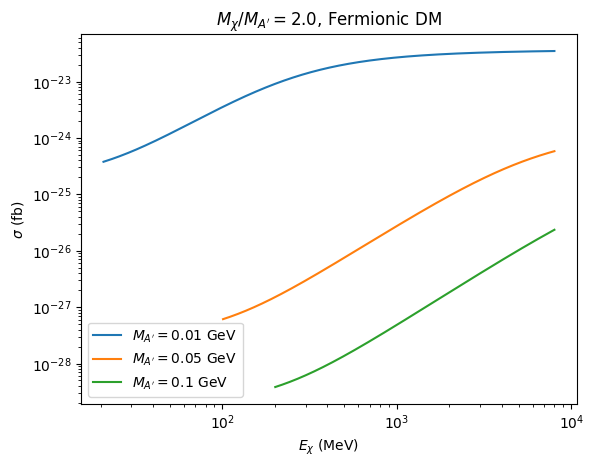

In [9]:
dts = [0.33, 0.6, 2.0]
MAs = [0.01*1000, 0.05*1000, 0.1*1000] # MeV

for dt in dts:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for ma in MAs:
        
        mchi = dt * ma
        EDM = np.linspace(mchi, 8000, 10000) # mchi to 8 GeV is typical for 0.33, eta, 0.05 MA
        E_e_min = Ee_theta(np.pi/2, EDM, mchi)
        E_e_max = Ee_theta(0, EDM, mchi)

        # hbar c = 200 MeV fm
        # 1 b = 100 fm^2
        # 1 fb = 100 * 10^-15 fm^2
        ans = 200**2 * (sigma_fermionic(E_e_max, EDM, mchi, ma) - sigma_fermionic(E_e_min, EDM, mchi, ma)) / (100*(10**15))
        #print(E_e_min[-1], E_e_max[-1], ans)
        ax.plot(EDM, ans, label=r"$M_{A'}=$"+f'{ma/1000} GeV')
        #ax.vlines(mchi, 10e-9, 10e-15, colors="k", linestyles='dashed')
        #ax.vlines(ma, 10e-9, 10e-13, colors="r", linestyles='dashed')

    ax.set(xlabel=r'$E_\chi$ (MeV)', ylabel=r'$\sigma$ (fb)', title=r"$M_\chi / M_{A'}=$"+f'{dt}, Fermionic DM')
    ax.legend()
    ax.loglog()
    plt.savefig(f"../plots/distributions/fb_sigma_fermionic_dt_{dt}.png")
    plt.show()

In [10]:
# lets say we have 5 MeV-2
print(5 * 200**2/ (100*(10**15)))
# hc = 0.389 GeV^2 mbarn
# 1 mbarn = 10^-3 barn
# 1 fb = 10^-15 barn
print(5 * 10**(3) * 10**(3) * 0.389  * 10**(12))
print(5 * 10**-3 * 2.56819*10**(-9) * 1000 * 1000)


2e-12
1.945e+18
1.2840950000000001e-05


In [11]:
def sigma_scalar(Ee, EDM, MDM, MDP):
    Me = 0.511 # MeV
    F2N1 = (4 * EDM * EDM * Me * Me + 2 * EDM * Me * MDP * MDP + MDP * MDP * MDM * MDM) / (2 * Ee * Me - 2 * Me * Me + MDP * MDP)
    F2N2 = (2 * EDM * Me + MDM * MDM) * np.log(2 * Ee * Me - 2 * Me * Me + MDP * MDP)
    F2D = 4 * Me * Me * (EDM * EDM - MDM * MDM)
    rF2 = -(F2N1 + F2N2) / F2D
    # Z = 18
    #return 18 * 4 * np.pi * kappa * kappa * alphaEM * alphaD * rF2
    return 4 * np.pi * kappa * kappa * alphaEM * alphaD * rF2

/tmp/ipykernel_161824/2379045948.py:6: RuntimeWarning: divide by zero encountered in divide
  rF2 = -(F2N1 + F2N2) / F2D
/tmp/ipykernel_161824/202948942.py:16: RuntimeWarning: invalid value encountered in subtract
  ans = sigma_scalar(E_e_max, EDM, mchi, ma) - sigma_scalar(E_e_min, EDM, mchi, ma)


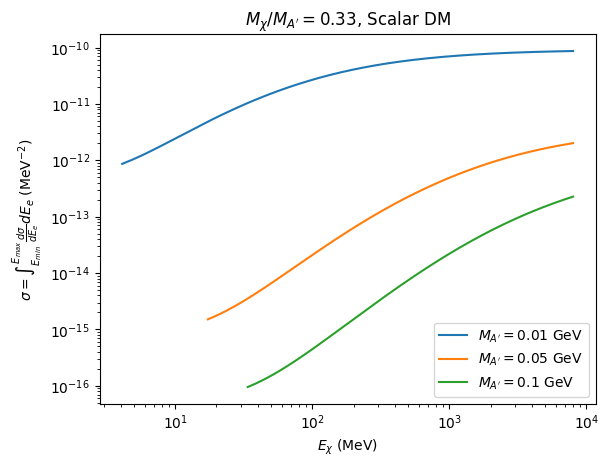

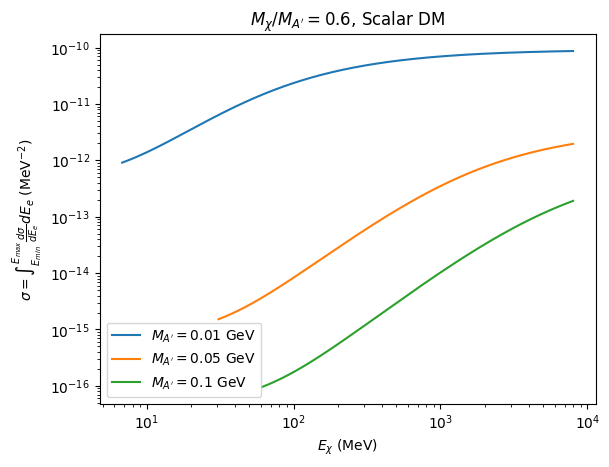

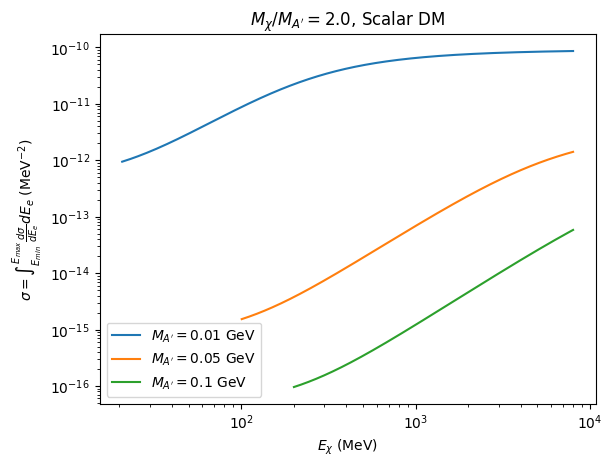

In [12]:
dts = [0.33, 0.6, 2.0]
MAs = [0.01*1000, 0.05*1000, 0.1*1000] # MeV



for dt in dts:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for ma in MAs:
        
        mchi = dt * ma
        EDM = np.linspace(mchi, 8000, 10000) # mchi to 8 GeV is typical for 0.33, eta, 0.05 MA
        E_e_min = Ee_theta(np.pi/2, EDM, mchi)
        E_e_max = Ee_theta(0, EDM, mchi)

        ans = sigma_scalar(E_e_max, EDM, mchi, ma) - sigma_scalar(E_e_min, EDM, mchi, ma)
        #print(E_e_min[-1], E_e_max[-1], ans)
        ax.plot(EDM, ans, label=r"$M_{A'}=$"+f'{ma/1000} GeV')
        #ax.vlines(mchi, 10e-9, 10e-15, colors="k", linestyles='dashed')
        #ax.vlines(ma, 10e-9, 10e-13, colors="r", linestyles='dashed')

    ax.set(xlabel=r'$E_\chi$ (MeV)', ylabel=r'$\sigma=\int_{E_{min}}^{E_{max}} \frac{d \sigma} {d E_e} dE_e$ (MeV$^{-2})$', title=r"$M_\chi / M_{A'}=$"+f'{dt}, Scalar DM')
    ax.legend()
    ax.loglog()
    plt.savefig(f"../plots/distributions/sigma_scalar_dt_{dt}.png")
    plt.show()


/tmp/ipykernel_161824/3626536273.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = Nominator / Denominator
/tmp/ipykernel_161824/3491038127.py:7: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return quad(dsigma_dE_fermionic, E_e_min, E_e_max, args=(echi, mchi, ma))[0]
/tmp/ipykernel_161824/346560502.py:10: RuntimeWarning: divide by zero encountered in divide
  return alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator
/tmp/ipykernel_161824/3491038127.py:30: RuntimeWarning: invalid value encountered in subtract
  ax.plot(EDM, sigma_fermionic(Ee_theta(0, EDM, mchi), EDM, mchi, ma) - sigma_fermionic(Ee_theta(np.pi/2, EDM, mchi), EDM, mchi, ma), label=r"$M_{A'}=$"+f'{ma/1000} GeV, Analytic', linestyle='dashed')


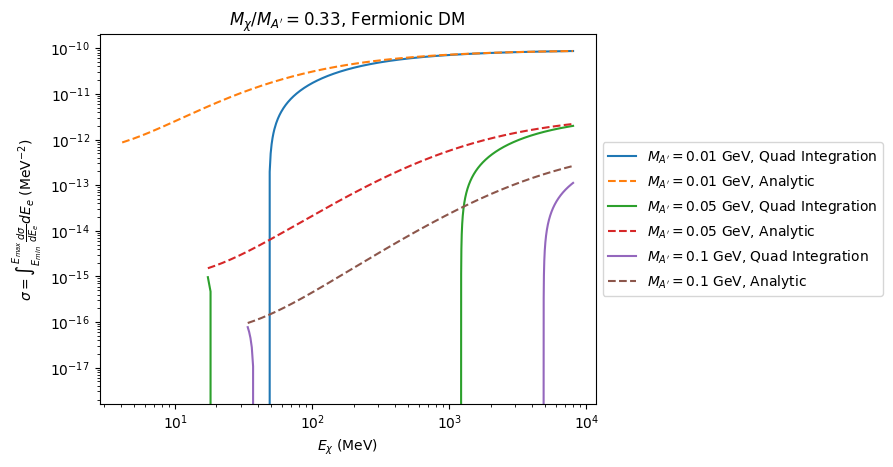

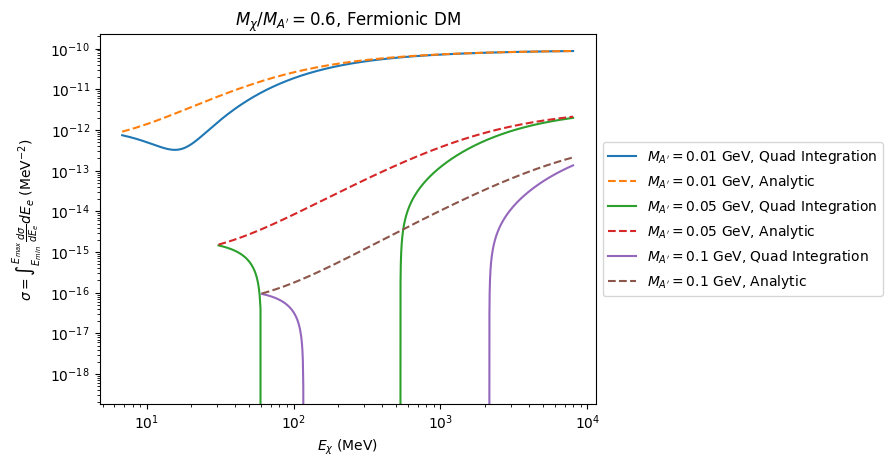

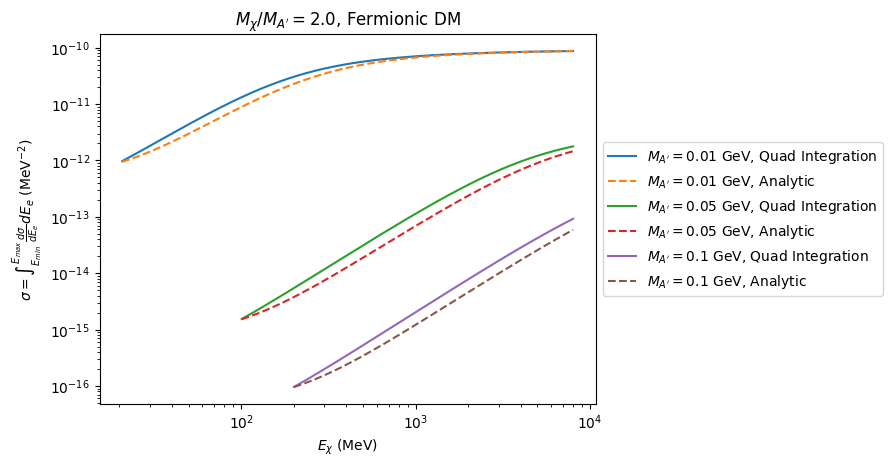

In [13]:
# use scipy to integrate dsigma_dE

def integrator(E_e_max : float, E_e_min : float, echi : float, mchi : float, ma : float):

    # Z = 18
    #return 18.0 * quad(dsigma_dE_fermionic, E_e_min, E_e_max, args=(echi, mchi, ma))[0]
    return quad(dsigma_dE_fermionic, E_e_min, E_e_max, args=(echi, mchi, ma))[0]

dts = [0.33, 0.6, 2.0]
MAs = [0.01*1000, 0.05*1000, 0.1*1000] # MeV

for dt in dts:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for ma in MAs:
        
        mchi = dt * ma
        EDM = np.linspace(mchi, 8000, 10000) # mchi to 8 GeV is typical for 0.33, eta, 0.05 MA

        cx = []
        for echi in EDM:
            E_e_min = Ee_theta(np.pi/2, echi, mchi)
            E_e_max = Ee_theta(0, echi, mchi)
            cx.append(integrator(E_e_max, E_e_min, echi, mchi, ma))
        
        
        #print(cx)
        #print(f"plotting {ma}")
        ax.plot(EDM, cx, label=r"$M_{A'}=$"+f'{ma/1000} GeV, Quad Integration')
        ax.plot(EDM, sigma_fermionic(Ee_theta(0, EDM, mchi), EDM, mchi, ma) - sigma_fermionic(Ee_theta(np.pi/2, EDM, mchi), EDM, mchi, ma), label=r"$M_{A'}=$"+f'{ma/1000} GeV, Analytic', linestyle='dashed')
        #ax.vlines(mchi, 10e-9, 10e-15, colors="k", linestyles='dashed')
    # move the legend outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.loglog()
    ax.set(xlabel=r'$E_\chi$ (MeV)', ylabel=r'$\sigma=\int_{E_{min}}^{E_{max}} \frac{d \sigma} {d E_e} dE_e$ (MeV$^{-2})$', title=r"$M_\chi / M_{A'}=$"+f'{dt}, Fermionic DM')
    
    fig.savefig(f"../plots/distributions/sigma_fermionic_dt_{dt}_quad.png")
    plt.show()
    

In [14]:
# Want to plot Scalar Vs Fermionic Cross Sections. Also Maybe cx of some SM processes?
# Should really do it in fb...

def conv_mev_to_fb(cx : np.array):
    # from http://www-pnp.physics.ox.ac.uk/~barra/teaching/natural_units.pdf
    # 1b = 0.00257 MeV^{-2}
    # 1 fb = 10^-15 barn
    return (cx / 0.00257) * 10**(15)

/tmp/ipykernel_161824/2379045948.py:6: RuntimeWarning: divide by zero encountered in divide
  rF2 = -(F2N1 + F2N2) / F2D
/tmp/ipykernel_161824/3968171330.py:15: RuntimeWarning: invalid value encountered in subtract
  cx_scalar = sigma_scalar(E_e_max, EDM, mchi, ma) - sigma_scalar(E_e_min, EDM, mchi, ma)
/tmp/ipykernel_161824/346560502.py:10: RuntimeWarning: divide by zero encountered in divide
  return alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator
/tmp/ipykernel_161824/3968171330.py:18: RuntimeWarning: invalid value encountered in subtract
  cx_fermionic = sigma_fermionic(E_e_max, EDM, mchi, ma) - sigma_fermionic(E_e_min, EDM, mchi, ma)


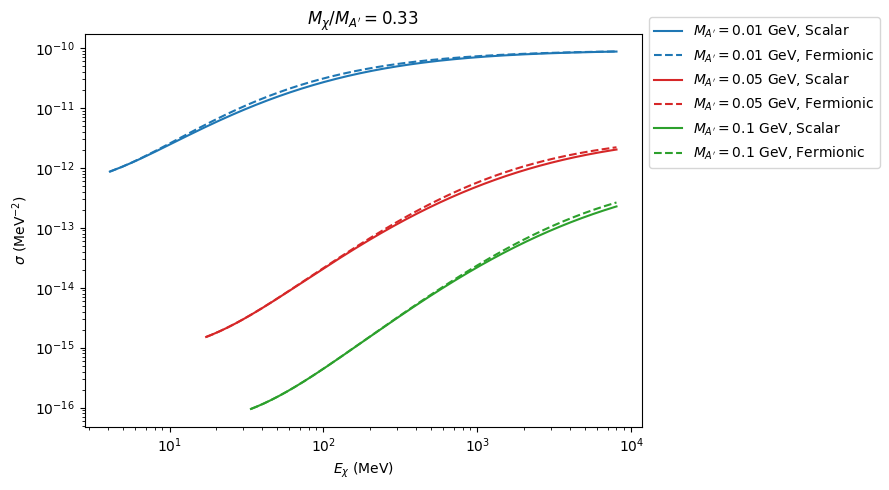

/tmp/ipykernel_161824/2379045948.py:6: RuntimeWarning: divide by zero encountered in divide
  rF2 = -(F2N1 + F2N2) / F2D
/tmp/ipykernel_161824/3968171330.py:15: RuntimeWarning: invalid value encountered in subtract
  cx_scalar = sigma_scalar(E_e_max, EDM, mchi, ma) - sigma_scalar(E_e_min, EDM, mchi, ma)
/tmp/ipykernel_161824/346560502.py:10: RuntimeWarning: divide by zero encountered in divide
  return alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator
/tmp/ipykernel_161824/3968171330.py:18: RuntimeWarning: invalid value encountered in subtract
  cx_fermionic = sigma_fermionic(E_e_max, EDM, mchi, ma) - sigma_fermionic(E_e_min, EDM, mchi, ma)


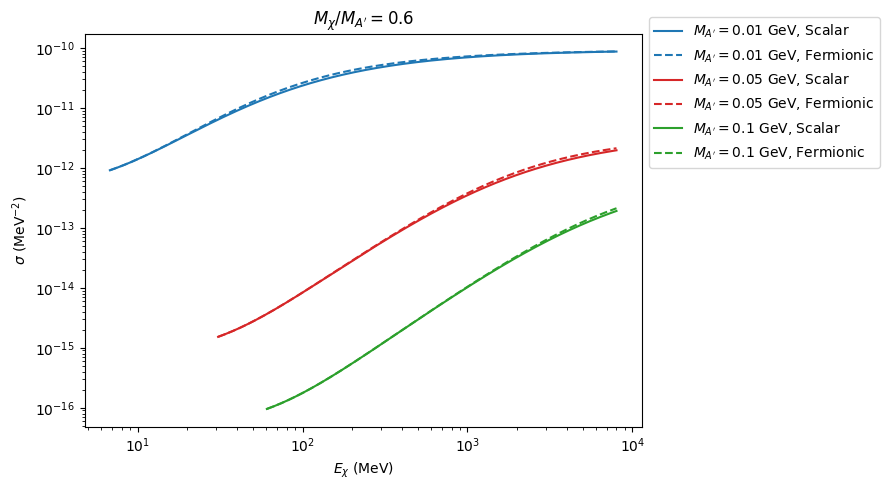

/tmp/ipykernel_161824/2379045948.py:6: RuntimeWarning: divide by zero encountered in divide
  rF2 = -(F2N1 + F2N2) / F2D
/tmp/ipykernel_161824/3968171330.py:15: RuntimeWarning: invalid value encountered in subtract
  cx_scalar = sigma_scalar(E_e_max, EDM, mchi, ma) - sigma_scalar(E_e_min, EDM, mchi, ma)
/tmp/ipykernel_161824/346560502.py:10: RuntimeWarning: divide by zero encountered in divide
  return alphaD * alphaEM * kappa * kappa * np.pi*(t1 + t2 + t3) / denominator
/tmp/ipykernel_161824/3968171330.py:18: RuntimeWarning: invalid value encountered in subtract
  cx_fermionic = sigma_fermionic(E_e_max, EDM, mchi, ma) - sigma_fermionic(E_e_min, EDM, mchi, ma)


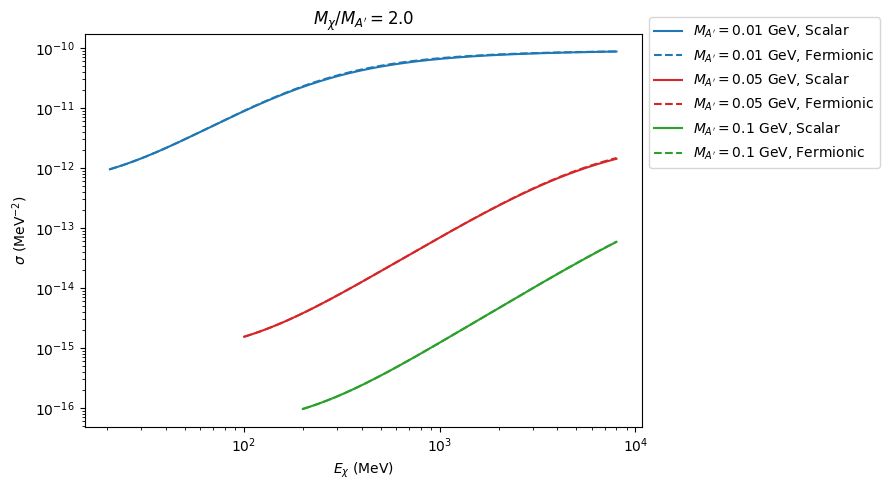

In [15]:
dts = [0.33, 0.6, 2.0]
MAs = [0.01*1000, 0.05*1000, 0.1*1000] # MeV
cols = ["tab:blue", "tab:red", "tab:green"]

for dt in dts:
    fig = plt.figure(figsize=(9,5))
    ax = fig.add_subplot(111)
    for i, ma in enumerate(MAs):
        mchi = dt * ma
        EDM = np.linspace(mchi, 8000, 10000)
        E_e_min = Ee_theta(np.pi/2, EDM, mchi)
        E_e_max = Ee_theta(0, EDM, mchi)

        # scalar cx
        cx_scalar = sigma_scalar(E_e_max, EDM, mchi, ma) - sigma_scalar(E_e_min, EDM, mchi, ma)

        # fermionic cx
        cx_fermionic = sigma_fermionic(E_e_max, EDM, mchi, ma) - sigma_fermionic(E_e_min, EDM, mchi, ma)

        # convert to fb
        #cx_scalar = conv_mev_to_fb(cx_scalar)
        #cx_fermionic = conv_mev_to_fb(cx_fermionic)

        ax.plot(EDM, cx_scalar, label=r"$M_{A'}=$"+f'{ma/1000} GeV, Scalar', color=cols[i])
        ax.plot(EDM, cx_fermionic, label=r"$M_{A'}=$"+f'{ma/1000} GeV, Fermionic', linestyle='dashed', color=cols[i])

    ax.set(xlabel=r'$E_\chi$ (MeV)', ylabel=r'$\sigma$ (MeV${}^{-2}$)', title=r"$M_\chi / M_{A'}=$"+f'{dt}')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))
    ax.loglog()
    fig.tight_layout()
    fig.savefig(f"../plots/distributions/sigma_both_dt_{dt}.png")
    fig.savefig(f"../plots/distributions/sigma_both_dt_{dt}.pdf")
    plt.show()




In [16]:
# sigma(v_mu + Ar -> mu- + X) ~ 0.85 x 10^-38 cm2 @ MicroBooNE @ 1GeV
# 1 barn = 10^-24 cm^2

print(0.85 * 10**-38 / 10**-24 * 10**15)


# At ArgoNeuT https://arxiv.org/pdf/1212.0060v1.pdf
# σ/Eν = (7.3±1.2)×10-39 cm2/GeV <Ev> = 4.3 GeV
print(7.3 * 10**-39 * 4.3 / 10**-24 * 10**15)

8.5
31.39


In [17]:
0.0890825 / 1.72658e-9

51594771.166120306

# Differential Branching Ratios

In [18]:
def pow(x, y):
    return x**y


mpi0 = 0.1349766
MASS_ELECTRON = 0.0005109989461
mmuon = 0.10576583745

def GammaV(mv, mx, kappa, alphaD):
    term = 0
    if(mv>2*mx):
        term = alphaD*(mv*mv-4*mx*mx)*np.sqrt(mv*mv/4-mx*mx)
    
    if(mv>2*MASS_ELECTRON):
        term += 4*pow(kappa,2)*alphaEM*(2*pow(MASS_ELECTRON,2)+mv*mv)*np.sqrt(mv*mv/4-pow(MASS_ELECTRON,2))
    
    if(mv>2*mmuon):
        term += 4*pow(kappa,2)*alphaEM*(2*pow(mmuon,2)+mv*mv)*np.sqrt(mv*mv/4-pow(mmuon,2))#I need to multiply this by the RRatio, but it's a minor overall effect when V->DM+DM is available;
    
    return 1.0/(6.0*mv*mv)*(term)


# d2Br / ds dtheta
def d2brpi0_to_gamma_dm_dm(mv, mx, kappa, alphaD, s, theta, dm_type):
    d2br = 0; 
    
    if(dm_type=="scalar"):
        d2br = np.sqrt(1-4*mx*mx/s)*pow(pow(mpi0,2)-s,3)*(s-4*mx*mx)*alphaD*pow(kappa,2)*pow(np.sin(theta),3)/(8*pow(mpi0,6)*np.pi*(pow(s-mv*mv,2)+pow(mv*GammaV(mv,mx,kappa,alphaD),2)))

    

    elif(dm_type=="fermion"):
        d2br =4*np.sqrt(1.0-4.0*mx*mx/s)*(pow(pow(mpi0,2)-s,3)*(s+2.0*mx*mx)*alphaD*pow(kappa,2))*pow(np.sin(theta),3)/(8*pow(mpi0,6)*np.pi*(pow(s-mv*mv,2)+pow(mv*GammaV(mv,mx,kappa,alphaD),2)))
    
    return d2br

# dBr / ds
def dbrpi0_to_gamma_dm_dm(mv, mx, kappa, alphaD, s, dm_type):
    dbr = 0

    if(dm_type=="scalar"):
        dbr=np.sqrt(1.0-4.0*mx*mx/s)*pow(pow(mpi0,2)-s,3)*(s-4.0*mx*mx)*alphaD*pow(kappa,2)/(6.0*pow(mpi0,6)*np.pi*(pow(s-mv*mv,2)+pow(mv*GammaV(mv,mx,kappa,alphaD),2)))


    elif(dm_type=="fermion"):
       dbr = 4*alphaD*np.sqrt(1.0-4.0*mx*mx/s)*pow(kappa,2)*pow(pow(mpi0,2)-s,3)*(s+2.0*mx*mx)/(6.0*pow(mpi0,6)*np.pi*(pow(s-mv*mv,2)+pow(mv*GammaV(mv,mx,kappa,alphaD),2)))
       #dbr = 4*alphaD*sqrt(1.0-4.0*mx*mx/s)*pow(kappa,2)*(pow(mpi0,2)-s)*(pow(pow(mpi0,2)-s,2)*(s+2.0*mx*mx) - 8*s*dot_chi1*dot_chi2)/(6.0*pow(mpi0,6)*pi*(pow(s-mv*mv,2)+pow(mv*GammaV(mv,mx,kappa,alphaD),2)));
    return dbr


In [19]:
print(dbrpi0_to_gamma_dm_dm, d2brpi0_to_gamma_dm_dm)

<function dbrpi0_to_gamma_dm_dm at 0x7fda2a3b1e10> <function d2brpi0_to_gamma_dm_dm at 0x7fda2a3b2d40>
